# Importing libraires

In [ ]:
#importing packages !

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sqlite3

In [3]:
# very first u have to create a SQL connection to our SQLite database

con = sqlite3.connect(r'C:\Users\karna\Desktop\zomato_rawdata.sqlite')

In [4]:
df = pd.read_sql_query("SELECT * FROM USERS" , con)

In [5]:
df.shape ## dimensions of data

(51717, 18)

## 2.. Do data cleaning/Data preparation !

In [6]:
 ## returns total missing values in every column
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [7]:
## tells data-types ofb every feature !
df.dtypes 

index                           int64
url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [8]:
## data cleaning on "approx_cost(for two people)"..

In [9]:
df['approx_cost(for two people)'].unique() ## getting all the uniques values in "approx_cost(for two people)" feature

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', None, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [10]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',' , '')   ## replace comma 

In [11]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', None, '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

In [12]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(float)   ## convert its data-type into float 

In [13]:
df['approx_cost(for two people)'].dtype

dtype('float64')

In [14]:
## data cleaning on "rate"..

In [15]:
df['rate']

0         4.1/5
1         4.1/5
2         3.8/5
3         3.7/5
4         3.8/5
          ...  
51712    3.6 /5
51713      None
51714      None
51715    4.3 /5
51716    3.4 /5
Name: rate, Length: 51717, dtype: object

In [16]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [17]:
df['rate'] = df['rate'].str.replace('/5' , '') ## replaceor remove "/5"

In [18]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       None, '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4',
       '2.2', '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ',
       '4.1 ', '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ',
       '2.5 ', '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1',
       '2.0', '1.8', '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ',
       '2.4 ', '2.1 ', '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [19]:
df['rate'] = df['rate'].astype(str)  ## convert its data-type into string ..

In [20]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       'None', '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4',
       '2.2', '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ',
       '4.1 ', '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ',
       '2.5 ', '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1',
       '2.0', '1.8', '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ',
       '2.4 ', '2.1 ', '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [21]:
df['rate'].replace('NEW' , np.nan , inplace=True)
df['rate'].replace('None' , np.nan , inplace=True)
df['rate'].replace('-' , np.nan , inplace=True)

In [22]:
df['rate'].isnull().sum()

10052

In [23]:
df['rate']

0         4.1
1         4.1
2         3.8
3         3.7
4         3.8
         ... 
51712    3.6 
51713     NaN
51714     NaN
51715    4.3 
51716    3.4 
Name: rate, Length: 51717, dtype: object

In [24]:
df['rate'] = df['rate'].astype(float)

## 3.. Analysing most famous dishes of most famous restaurants ..


We will consider those rest as most famous rest which have delivered max number of Orders



In [25]:
df['rest_type'].value_counts()

rest_type
Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: count, Length: 93, dtype: int64

In [26]:
df['rest_type'].isnull().sum()

227

In [27]:
data = df.dropna(subset=['rest_type']) ## delete missing values of 'rest_type' feature ..

In [28]:
data.shape

(51490, 18)

In [29]:
data['rest_type'].str.contains('Quick Bites')

0        False
1        False
2        False
3         True
4        False
         ...  
51712    False
51713    False
51714    False
51715    False
51716    False
Name: rest_type, Length: 51490, dtype: bool

In [30]:
data_qb = data[data['rest_type'].str.contains('Quick Bites')] ## getting dataframe of only 'Quick Bites' dataframe ..

In [31]:
data_qb.shape

(20639, 18)

In [32]:
data_qb['dish_liked']

3                                              Masala Dosa
23                                         Pasta, Iced Tea
26                                                    None
31       Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...
34       Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...
                               ...                        
51641                                                 None
51642                                                 None
51643                                                 None
51644                                                 None
51645                                              Burgers
Name: dish_liked, Length: 20639, dtype: object

In [33]:
data_qb['dish_liked'].str.lower()

3                                              masala dosa
23                                         pasta, iced tea
26                                                    None
31       burgers, lassi, chicken grill, naan, momos, ch...
34       rolls, veggie wrap, chocolate fantasy, rice bo...
                               ...                        
51641                                                 None
51642                                                 None
51643                                                 None
51644                                                 None
51645                                              burgers
Name: dish_liked, Length: 20639, dtype: object

In [34]:
all_dishes = data_qb['dish_liked'].str.lower().str.cat()

## Storing all liked_dishes in a string so that later-on , we can plot it using wordcloud or Plots/charts ..

In [35]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [36]:
import wordcloud

In [37]:
from wordcloud import WordCloud

In [38]:
wordcloud = WordCloud().generate(all_dishes)

(-0.5, 399.5, 199.5, -0.5)

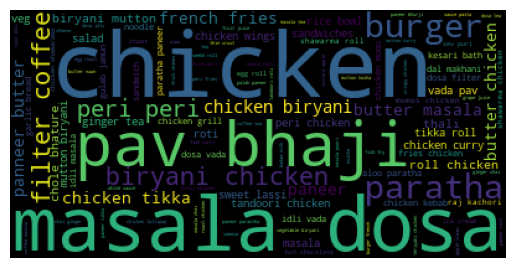

In [39]:
plt.imshow(wordcloud)
plt.axis('off')



Insights/Conclusions : Bengaluru people loves Masala dosa(South Indian dish) , Biryani , Chicken , Burger  , Paratha !



## 4.. Handling Missing Values 

In [40]:
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                           10052
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64


    -->> if its a ML/NLP/DL project , then filling missing values makes alot of sense..

    -->> but as its is data analysis project & Imagine we do not have domain knowledge , 
    then its good to continue with existing Genuine data rather than filling missing values or deleting it..
    
        -->>> Bcz if we fill missing values then it can affect our real analysis  ,
        -->>  & if we delete our missing values,then we will lose our data & hence we will end up having incomplete analysis

    Before deleting or Skipping Null values

    -->> We are intersted in this analysis for the rate feature , so dropping missing values of 
         rate might affect other features for analyis.. So Lets try to save as much of our data

    -->> So let's have a look on the review list column to fill missing values of "rate" feature ..

In [41]:
df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [42]:
df[['rate' , 'reviews_list']]

,rate,reviews_list
0,4.1,"[('Rated 4.0', 'RATED\n A beautiful place to ..."
1,4.1,"[('Rated 4.0', 'RATED\n Had been here for din..."
2,3.8,"[('Rated 3.0', ""RATED\n Ambience is not that ..."
3,3.7,"[('Rated 4.0', ""RATED\n Great food and proper..."
4,3.8,"[('Rated 4.0', 'RATED\n Very good restaurant ..."
...,...,...
51712,3.6,"[('Rated 5.0', ""RATED\n Food and service are ..."
51713,NaN,[]
51714,NaN,[]
51715,4.3,"[('Rated 4.0', 'RATED\n Nice and friendly pla..."


In [43]:
df['rate'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
51712    False
51713     True
51714     True
51715    False
51716    False
Name: rate, Length: 51717, dtype: bool

In [44]:
df[df['rate'].isnull()] ## rows in which 'rate' have missing value ..

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
72,72,https://www.zomato.com/bangalore/spicy-tandoor...,"Opposite ICICi Bank, Hanuman Nagar, Banashanka...",Spicy Tandoor,No,No,NaN,0,+91 8050884222,Banashankari,Quick Bites,None,North Indian,150.0,"[('Rated 4.0', 'RATED\n cost for chicken roll...",[],Delivery,Banashankari
75,75,https://www.zomato.com/bangalore/om-sri-vinaya...,"39, S B M Colony, Near-Sita Circle, 1st Stage,...",Om Sri Vinayaka Chats,No,No,NaN,0,+91 8553206035,Banashankari,"Takeaway, Delivery",None,"Street Food, Fast Food",500.0,[],[],Delivery,Banashankari
84,84,https://www.zomato.com/bangalore/chill-out-ban...,"161/C, 6th Main, 80 Feet Road, Bhuvaneshwari N...",Chill Out,No,No,NaN,0,+91 9341215167,Banashankari,Quick Bites,None,"South Indian, Chinese",100.0,"[('Rated 4.0', 'RATED\n Good Location. Small ...",[],Delivery,Banashankari
90,90,https://www.zomato.com/bangalore/me-and-my-cak...,"BDA Shopping Complex, 24th Cross Road, Siddann...",Me And My Cake,No,No,NaN,0,+91 9036070410,Banashankari,Delivery,None,"Bakery, Desserts",500.0,"[('Rated 1.0', 'RATED\n Do not order anything...",[],Delivery,Banashankari
91,91,https://www.zomato.com/bangalore/sunsadm-banas...,"Shop 18 , 3rd cross road,Markandeya Layout, Ba...",Sunsadm,No,No,NaN,0,+91 7829290358,Banashankari,"Takeaway, Delivery",None,South Indian,400.0,[],[],Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51644,51644,https://www.zomato.com/bangalore/punjabi-thadk...,"7/3, ASK Tower, Kundanahalli Gate, Next to Bat...",Punjabi Thadka,No,No,NaN,0,+91 7338330336\n+91 9591568221,Brookefield,Quick Bites,None,North Indian,400.0,[],[],Dine-out,Whitefield
51675,51675,https://www.zomato.com/bangalore/topsy-turvey-...,"2E2, 4th Cross Road, Devasandra Industrial Est...",Topsy Turvey,No,No,NaN,0,+91 9148155994,Whitefield,Bar,None,Finger Food,900.0,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",[],Drinks & nightlife,Whitefield
51710,51710,https://www.zomato.com/bangalore/topsy-turvey-...,"2E2, 4th Cross Road, Devasandra Industrial Est...",Topsy Turvey,No,No,NaN,0,+91 9148155994,Whitefield,Bar,None,Finger Food,900.0,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",[],Pubs and bars,Whitefield
51713,51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,None,Finger Food,600.0,[],[],Pubs and bars,Whitefield


In [45]:
df[df['rate'].isnull()].index ## indexes at which 'rate' have missing value ..

Index([   72,    75,    84,    90,    91,    92,   107,   110,   113,   114,
       ...
       51636, 51638, 51639, 51642, 51643, 51644, 51675, 51710, 51713, 51714],
      dtype='int64', length=10052)

In [46]:
df['rate'][72] ## as at 72 index we have Nan(missing value) in 'rate'

nan

In [47]:
df['reviews_list'][72]

"[('Rated 4.0', 'RATED\\n  cost for chicken rolls is very high but fine taste by pandey and is crew. pls deduct the cost of rolls and great variety of food is been served'), ('Rated 5.0', 'RATED\\n  Awesome taste, feel rich taste of food, cleanness is very good, very friendly nature by the hotel person, totally awesome, all the best gud luck')]"

In [48]:
type(df['reviews_list'][72])

str

    -->> Using ast library , we will convert this string into list having separator as comma(,)
    -->> Then from this list , we can extract our rating..

In [49]:
import ast 

In [50]:
ast.literal_eval(df['reviews_list'][72]) # return "a list of tuples"

[('Rated 4.0',
  'RATED\n  cost for chicken rolls is very high but fine taste by pandey and is crew. pls deduct the cost of rolls and great variety of food is been served'),
 ('Rated 5.0',
  'RATED\n  Awesome taste, feel rich taste of food, cleanness is very good, very friendly nature by the hotel person, totally awesome, all the best gud luck')]

In [51]:
# Consider first input/feedback/review 

first_input = ast.literal_eval(df['reviews_list'][72])[0]

In [52]:
first_input

('Rated 4.0',
 'RATED\n  cost for chicken rolls is very high but fine taste by pandey and is crew. pls deduct the cost of rolls and great variety of food is been served')

In [53]:
[i.replace('Rated' , '').strip() for i in first_input] ## remove "Rated" !

['4.0',
 'RATED\n  cost for chicken rolls is very high but fine taste by pandey and is crew. pls deduct the cost of rolls and great variety of food is been served']

In [54]:
[i.replace('Rated' , '').strip() for i in first_input][0]

'4.0'

In [55]:
type([i.replace('Rated' , '').strip() for i in first_input][0])

str

In [56]:
float([i.replace('Rated' , '').strip() for i in first_input][0]) ## convert string value into float..

4.0

### let's make function so that we are able to apply this function on "reviews_list" to extract "rating" as much as we can !

In [57]:
def get_Rate(x):
    list_of_reviews = ast.literal_eval(x)
    
    if list_of_reviews is None or len(list_of_reviews)<=1:
        return None
    else:
        first_input = list_of_reviews[0]
        rate = float([i.replace('Rated' , '').strip() for i in first_input][0])
        return rate

In [58]:
df['rate_from_reviews_list'] = df['reviews_list'].apply(get_Rate) ## applying function

In [59]:
get_Rate(df['reviews_list'][72])

4.0

## 5.. filling missing values !

In [60]:
df['rate_from_reviews_list']

0        4.0
1        4.0
2        3.0
3        4.0
4        4.0
        ... 
51712    5.0
51713    NaN
51714    NaN
51715    4.0
51716    5.0
Name: rate_from_reviews_list, Length: 51717, dtype: float64

In [61]:
df['rate_from_reviews_list'][72]

4.0

In [62]:
df['rate'][72]

nan

In [63]:
df['rate'][72] = df['rate_from_reviews_list'][72] ## lets fill "nan" with 4.0

C:\Users\karna\AppData\Local\Temp\ipykernel_14900\3626387152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rate'][72] = df['rate_from_reviews_list'][72] ## lets fill "nan" with 4.0


In [64]:
## use warnings to get rid of any warning !
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [65]:
df['rate'][72]

4.0

In [66]:
df['rate'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
51712    False
51713     True
51714     True
51715    False
51716    False
Name: rate, Length: 51717, dtype: bool

In [67]:
df[df['rate'].isnull()] ## getting entire dataframe where we have missing value in "rate" feature 

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rate_from_reviews_list
75,75,https://www.zomato.com/bangalore/om-sri-vinaya...,"39, S B M Colony, Near-Sita Circle, 1st Stage,...",Om Sri Vinayaka Chats,No,No,NaN,0,+91 8553206035,Banashankari,"Takeaway, Delivery",None,"Street Food, Fast Food",500.0,[],[],Delivery,Banashankari,NaN
84,84,https://www.zomato.com/bangalore/chill-out-ban...,"161/C, 6th Main, 80 Feet Road, Bhuvaneshwari N...",Chill Out,No,No,NaN,0,+91 9341215167,Banashankari,Quick Bites,None,"South Indian, Chinese",100.0,"[('Rated 4.0', 'RATED\n Good Location. Small ...",[],Delivery,Banashankari,NaN
90,90,https://www.zomato.com/bangalore/me-and-my-cak...,"BDA Shopping Complex, 24th Cross Road, Siddann...",Me And My Cake,No,No,NaN,0,+91 9036070410,Banashankari,Delivery,None,"Bakery, Desserts",500.0,"[('Rated 1.0', 'RATED\n Do not order anything...",[],Delivery,Banashankari,1.0
91,91,https://www.zomato.com/bangalore/sunsadm-banas...,"Shop 18 , 3rd cross road,Markandeya Layout, Ba...",Sunsadm,No,No,NaN,0,+91 7829290358,Banashankari,"Takeaway, Delivery",None,South Indian,400.0,[],[],Delivery,Banashankari,NaN
92,92,https://www.zomato.com/bangalore/annapooranesh...,"625, 5th Cross Road, Hanumanthnagar, Banashank...",Annapooraneshwari Mess,No,No,NaN,0,+91 9742009518,Banashankari,Mess,None,South Indian,200.0,[],[],Delivery,Banashankari,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51644,51644,https://www.zomato.com/bangalore/punjabi-thadk...,"7/3, ASK Tower, Kundanahalli Gate, Next to Bat...",Punjabi Thadka,No,No,NaN,0,+91 7338330336\n+91 9591568221,Brookefield,Quick Bites,None,North Indian,400.0,[],[],Dine-out,Whitefield,NaN
51675,51675,https://www.zomato.com/bangalore/topsy-turvey-...,"2E2, 4th Cross Road, Devasandra Industrial Est...",Topsy Turvey,No,No,NaN,0,+91 9148155994,Whitefield,Bar,None,Finger Food,900.0,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",[],Drinks & nightlife,Whitefield,NaN
51710,51710,https://www.zomato.com/bangalore/topsy-turvey-...,"2E2, 4th Cross Road, Devasandra Industrial Est...",Topsy Turvey,No,No,NaN,0,+91 9148155994,Whitefield,Bar,None,Finger Food,900.0,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",[],Pubs and bars,Whitefield,NaN
51713,51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,None,Finger Food,600.0,[],[],Pubs and bars,Whitefield,NaN


In [68]:
nan_index = df[df['rate'].isnull()].index ## getting all the Nan's indexes

In [69]:
nan_index

Index([   75,    84,    90,    91,    92,   107,   110,   113,   114,   115,
       ...
       51636, 51638, 51639, 51642, 51643, 51644, 51675, 51710, 51713, 51714],
      dtype='int64', length=10051)

In [70]:
###  filling the missing values of rate feature..

for index in nan_index:
    df['rate'][index] = df['rate_from_reviews_list'][index]

In [71]:
df['rate'].isnull().sum() ### ie we are able to fill approx 1500 missing values of 'rate'..

8542

In [72]:
df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'rate_from_reviews_list'],
      dtype='object')

In [73]:
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            8542
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
rate_from_reviews_list         16120
dtype: int64

In [74]:
### Since more than 50% data in dish_liked feature is vacant , lets drop this feature ..

In [75]:
dataframe = df.drop(['dish_liked' , 'rate_from_reviews_list'] , axis=1)

In [76]:
dataframe.head(3)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


## 6.. Doing Feature extraction :

In [77]:
dataframe['cuisines']

0                North Indian, Mughlai, Chinese
1                   Chinese, North Indian, Thai
2                        Cafe, Mexican, Italian
3                    South Indian, North Indian
4                      North Indian, Rajasthani
                          ...                  
51712                               Continental
51713                               Finger Food
51714                               Finger Food
51715                               Finger Food
51716    Finger Food, North Indian, Continental
Name: cuisines, Length: 51717, dtype: object

In [78]:
dataframe['cuisines'][0]

'North Indian, Mughlai, Chinese'

In [79]:
type(dataframe['cuisines'][0])

str

In [80]:
dataframe['cuisines'][0].split(',')

['North Indian', ' Mughlai', ' Chinese']

In [81]:
len(dataframe['cuisines'][0].split(',')) ## ie we have total 3 cuisines at 0th index..

3

In [82]:
def count(row):
    return len(row.split(','))

In [83]:
dataframe['total_cuisines'] = dataframe['cuisines'].astype(str).apply(count)
dataframe['multiple_types'] = dataframe['rest_type'].astype(str).apply(count)

In [84]:
dataframe.head(2)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),total_cuisines,multiple_types
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,3,1
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,3,1


In [85]:
# Defining a custom threshold for splitting restaurants into good and bad

threshold = 3.80
dataframe['target'] = dataframe['rate'].apply(lambda x : 1 if x >= threshold else 0 )

In [86]:
dataframe.head(4)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),total_cuisines,multiple_types,target
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,3,1,1
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,3,1,1
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3,2,1
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,2,1,0


## 7.. Feature importance !

In [87]:
dataframe['target']==0

0        False
1        False
2        False
3         True
4        False
         ...  
51712     True
51713     True
51714     True
51715    False
51716     True
Name: target, Length: 51717, dtype: bool

In [88]:
dataframe.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'total_cuisines',
       'multiple_types', 'target'],
      dtype='object')

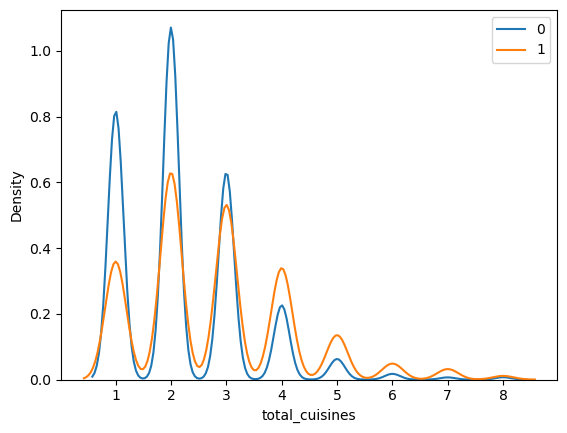

In [89]:
sns.distplot(dataframe[dataframe['target']==0]['total_cuisines'] , hist=False , label='0')
sns.distplot(dataframe[dataframe['target']==1]['total_cuisines'] , hist=False , label='1')
plt.legend()

In [90]:
### As we have complete overlappping region in distribution plot 
### when class is 0 , we have higher count of 'total_cuisines' than class 1 

## it means 'total_cuisines' is not an interesting feature in predicting whether rest will be success or not 
## as we have very less overlapping region

In [91]:
dataframe.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'total_cuisines',
       'multiple_types', 'target'],
      dtype='object')

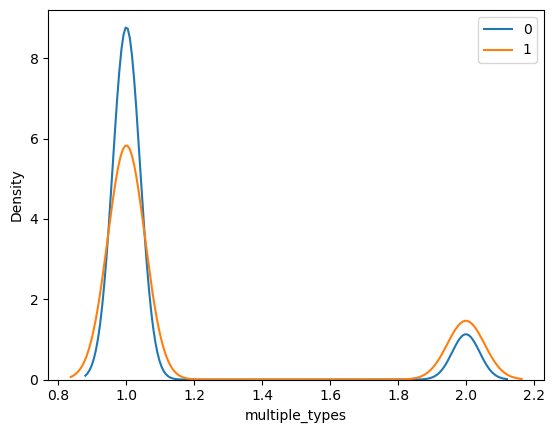

In [92]:
sns.distplot(dataframe[dataframe['target']==0]['multiple_types'] , hist=False , label='0')
sns.distplot(dataframe[dataframe['target']==1]['multiple_types'] , hist=False , label='1')
plt.legend()

In [93]:
'''

Similarly 'multiple_types' is not an interesting feature in predicting whether rest will be success or not 
as we have very less overlapping region


'''

"\n\nSimilarly 'multiple_types' is not an interesting feature in predicting whether rest will be success or not \nas we have very less overlapping region\n\n\n"

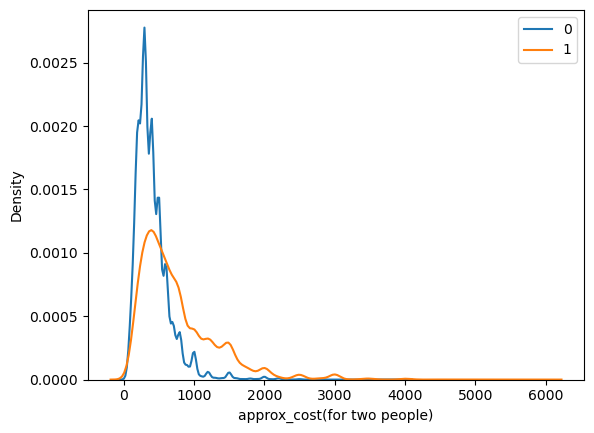

In [94]:
sns.distplot(dataframe[dataframe['target']==0]['approx_cost(for two people)'] , hist=False , label='0')
sns.distplot(dataframe[dataframe['target']==1]['approx_cost(for two people)'] , hist=False , label='1')
plt.legend()

In [95]:
### ie upto some extent , "approx_cost(for two people)" feature is useful ..

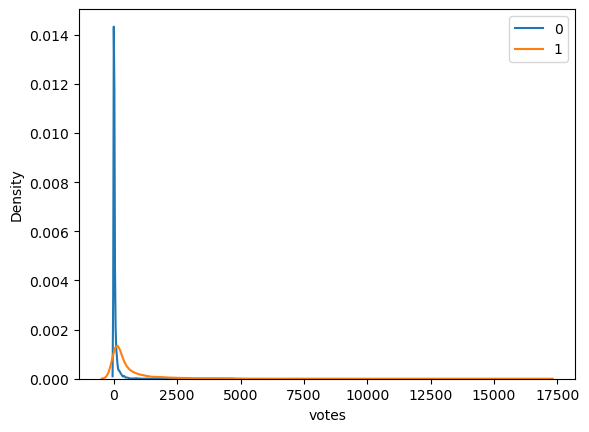

In [96]:
sns.distplot(dataframe[dataframe['target']==0]['votes'] , hist=False , label='0')
sns.distplot(dataframe[dataframe['target']==1]['votes'] , hist=False , label='1')
plt.legend()

In [97]:
### ie upto some extent , 'votes' feature is useful ..

In [98]:
dataframe.head(3)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),total_cuisines,multiple_types,target
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,3,1,1
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,3,1,1
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3,2,1


# Splitting cat and numerical features

In [99]:
dataframe['online_order']

0        Yes
1        Yes
2        Yes
3         No
4         No
        ... 
51712     No
51713     No
51714     No
51715     No
51716     No
Name: online_order, Length: 51717, dtype: object

In [100]:
dataframe.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'total_cuisines',
       'multiple_types', 'target'],
      dtype='object')

In [101]:
dataframe = dataframe.dropna()

In [102]:
dataframe.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'total_cuisines',
       'multiple_types', 'target'],
      dtype='object')

In [103]:
imp_features = ['online_order', 'book_table',
       'votes',  'location', 'rest_type', 
       'approx_cost(for two people)', 
       'listed_in(type)', 'listed_in(city)', 'target']

In [104]:
data = dataframe[imp_features]

In [105]:
data.shape

(42144, 9)

In [106]:
# Splitting features by data type

In [107]:
cat_features = [col for col in data.columns if data[col].dtype=='O']

In [108]:
num_features = [col for col in data.columns if data[col].dtype!='O']

## 9.. Performing One-hot encoding on data !

In [109]:
data['online_order'].nunique()

2

In [110]:
for feature in cat_features:
    print('{} has total {} unique features'.format(feature , data[feature].nunique()))

online_order has total 2 unique features
book_table has total 2 unique features
location has total 92 unique features
rest_type has total 87 unique features
listed_in(type) has total 7 unique features
listed_in(city) has total 30 unique features


In [111]:
'''

Regarding One-hot encoding which is the most used & basic one as well , 
So if we will observe over here,we have many categories in 'rest_type' ,'location' , 'listed_in(city)' , 
thus if we encode it using onne-hot encoding, it will consume more memory in our system & will create un-necessarily 209
more features as 92 + 87 + 30 = 209 features

'''

"\n\nRegarding One-hot encoding which is the most used & basic one as well , \nSo if we will observe over here,we have many categories in 'rest_type' ,'location' , 'listed_in(city)' , \nthus if we encode it using onne-hot encoding, it will consume more memory in our system & will create un-necessarily 209\nmore features as 92 + 87 + 30 = 209 features\n\n"

In [112]:
data['rest_type']

0              Casual Dining
1              Casual Dining
2        Cafe, Casual Dining
3                Quick Bites
4              Casual Dining
                ...         
51709     Casual Dining, Bar
51711     Casual Dining, Bar
51712                    Bar
51715                    Bar
51716     Bar, Casual Dining
Name: rest_type, Length: 42144, dtype: object

In [113]:
freq_cat = data['rest_type'].value_counts()[0:5]/len(data)*100

In [114]:
freq_cat

rest_type
Quick Bites       33.857726
Casual Dining     23.156321
Cafe               7.984529
Dessert Parlor     4.477506
Delivery           4.057517
Name: count, dtype: float64

In [115]:
freq_cat.index ## these are most frequent values in 'rest_type' feature..

Index(['Quick Bites', 'Casual Dining', 'Cafe', 'Dessert Parlor', 'Delivery'], dtype='object', name='rest_type')

In [116]:
data['rest_type'].isin(freq_cat.index)

0         True
1         True
2        False
3         True
4         True
         ...  
51709    False
51711    False
51712    False
51715    False
51716    False
Name: rest_type, Length: 42144, dtype: bool

In [117]:
data[data['rest_type'].isin(freq_cat.index)]

,online_order,book_table,votes,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),target
0,Yes,Yes,775,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1
1,Yes,No,787,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1
3,No,No,88,Banashankari,Quick Bites,300.0,Buffet,Banashankari,0
4,No,No,166,Basavanagudi,Casual Dining,600.0,Buffet,Banashankari,1
5,Yes,No,286,Basavanagudi,Casual Dining,600.0,Buffet,Banashankari,1
...,...,...,...,...,...,...,...,...,...
51632,No,No,4,KR Puram,Quick Bites,350.0,Dine-out,Whitefield,0
51634,No,No,34,Brookefield,Quick Bites,200.0,Dine-out,Whitefield,0
51635,No,No,7,KR Puram,Quick Bites,400.0,Dine-out,Whitefield,0
51640,No,No,31,KR Puram,Quick Bites,400.0,Dine-out,Whitefield,0


In [118]:
data['rest_type'] = data['rest_type'].apply(lambda x : 'other' if x not in freq_cat.index else x)

## ie, if rest_type doesn't belong to index of freq_cat , we will assign 'other' category to rest_type otherwise remain as it is ! 

In [119]:
data['rest_type']

0        Casual Dining
1        Casual Dining
2                other
3          Quick Bites
4        Casual Dining
             ...      
51709            other
51711            other
51712            other
51715            other
51716            other
Name: rest_type, Length: 42144, dtype: object

In [120]:
data['listed_in(city)'].value_counts()/len(data)*100

## One-hot will not be good here as Top 5 or Top 10 categories doesnt have 80-90% of data points 

listed_in(city)
BTM                      6.304575
Koramangala 7th Block    5.682897
Koramangala 5th Block    5.464598
Koramangala 4th Block    5.455106
Koramangala 6th Block    5.108675
Jayanagar                4.683941
JP Nagar                 4.002942
Indiranagar              3.734814
Church Street            3.673121
MG Road                  3.644647
Brigade Road             3.571090
Lavelle Road             3.485668
HSR                      3.246014
Residency Road           3.219913
Marathahalli             3.113136
Bannerghatta Road        2.987377
Whitefield               2.920938
Old Airport Road         2.821279
Brookefield              2.783314
Basavanagudi             2.565015
Kammanahalli             2.484339
Sarjapur Road            2.446374
Kalyan Nagar             2.432137
Bellandur                2.337225
Frazer Town              2.318242
Malleshwaram             2.242312
Electronic City          2.080961
Rajajinagar              2.078588
Banashankari             1.74402

In [121]:
data['location'].value_counts()/len(data)*100 

## One-hot will not be good here as Top 5 or Top 10 categories doesnt have 80-90% of data points 

location
BTM                      9.586181
Koramangala 5th Block    5.457479
HSR                      4.857156
Indiranagar              4.325645
JP Nagar                 4.235478
                           ...   
Yelahanka                0.009491
West Bangalore           0.009491
Rajarajeshwari Nagar     0.004746
Nagarbhavi               0.002373
Peenya                   0.002373
Name: count, Length: 92, dtype: float64

In [122]:
cat_features

['online_order',
 'book_table',
 'location',
 'rest_type',
 'listed_in(type)',
 'listed_in(city)']

In [123]:
pd.get_dummies(data['online_order'] , prefix='online_order' , drop_first=True) ## Applying one-hot on "online_order" feature

,online_order_Yes
0,True
1,True
2,True
3,False
4,False
...,...
51709,False
51711,False
51712,False
51715,False


In [124]:
## Applying one-hot on ['online_order', 'book_table', 'rest_type', 'listed_in(type)']

for col in ['online_order', 'book_table', 'rest_type', 'listed_in(type)']:
    col_encoded = pd.get_dummies(data[col] , prefix=col , drop_first=True)
    data = pd.concat([data , col_encoded] , axis=1)

In [125]:
data.head(4)

,online_order,book_table,votes,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),target,online_order_Yes,...,rest_type_Delivery,rest_type_Dessert Parlor,rest_type_Quick Bites,rest_type_other,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
0,Yes,Yes,775,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1,True,...,False,False,False,False,False,False,False,False,False,False
1,Yes,No,787,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1,True,...,False,False,False,False,False,False,False,False,False,False
2,Yes,No,918,Banashankari,other,800.0,Buffet,Banashankari,1,True,...,False,False,False,True,False,False,False,False,False,False
3,No,No,88,Banashankari,Quick Bites,300.0,Buffet,Banashankari,0,False,...,False,False,True,False,False,False,False,False,False,False


In [126]:
cat_features

['online_order',
 'book_table',
 'location',
 'rest_type',
 'listed_in(type)',
 'listed_in(city)']

## 10.. Performing Mean Encoding on data !

In [127]:
cat_features

['online_order',
 'book_table',
 'location',
 'rest_type',
 'listed_in(type)',
 'listed_in(city)']

In [128]:
data[['location' , 'listed_in(city)']]

,location,listed_in(city)
0,Banashankari,Banashankari
1,Banashankari,Banashankari
2,Banashankari,Banashankari
3,Banashankari,Banashankari
4,Basavanagudi,Banashankari
...,...,...
51709,Whitefield,Whitefield
51711,Whitefield,Whitefield
51712,Whitefield,Whitefield
51715,"ITPL Main Road, Whitefield",Whitefield


In [129]:
dict_mean_location  = data.groupby(['location'])['target'].mean().to_dict()

In [130]:
data['location']

0                      Banashankari
1                      Banashankari
2                      Banashankari
3                      Banashankari
4                      Basavanagudi
                    ...            
51709                    Whitefield
51711                    Whitefield
51712                    Whitefield
51715    ITPL Main Road, Whitefield
51716    ITPL Main Road, Whitefield
Name: location, Length: 42144, dtype: object

In [131]:
data['location'] = data['location'].map(dict_mean_location) ## lets map "dict_mean_location" on top of "location" feature

In [132]:
data['location']

0        0.477124
1        0.477124
2        0.477124
3        0.477124
4        0.523333
           ...   
51709    0.404599
51711    0.404599
51712    0.404599
51715    0.329670
51716    0.329670
Name: location, Length: 42144, dtype: float64

In [133]:
dict_mean_city = data.groupby(['listed_in(city)'])['target'].mean().to_dict()

In [134]:
data['listed_in(city)'] = data['listed_in(city)'].map(dict_mean_location)

In [135]:
data['listed_in(city)']

0        0.477124
1        0.477124
2        0.477124
3        0.477124
4        0.477124
           ...   
51709    0.404599
51711    0.404599
51712    0.404599
51715    0.404599
51716    0.404599
Name: listed_in(city), Length: 42144, dtype: float64

In [136]:
cat_features

['online_order',
 'book_table',
 'location',
 'rest_type',
 'listed_in(type)',
 'listed_in(city)']

In [137]:
data.head(3)

,online_order,book_table,votes,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),target,online_order_Yes,...,rest_type_Delivery,rest_type_Dessert Parlor,rest_type_Quick Bites,rest_type_other,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
0,Yes,Yes,775,0.477124,Casual Dining,800.0,Buffet,0.477124,1,True,...,False,False,False,False,False,False,False,False,False,False
1,Yes,No,787,0.477124,Casual Dining,800.0,Buffet,0.477124,1,True,...,False,False,False,False,False,False,False,False,False,False
2,Yes,No,918,0.477124,other,800.0,Buffet,0.477124,1,True,...,False,False,False,True,False,False,False,False,False,False


In [138]:
data.columns

Index(['online_order', 'book_table', 'votes', 'location', 'rest_type',
       'approx_cost(for two people)', 'listed_in(type)', 'listed_in(city)',
       'target', 'online_order_Yes', 'book_table_Yes',
       'rest_type_Casual Dining', 'rest_type_Delivery',
       'rest_type_Dessert Parlor', 'rest_type_Quick Bites', 'rest_type_other',
       'listed_in(type)_Cafes', 'listed_in(type)_Delivery',
       'listed_in(type)_Desserts', 'listed_in(type)_Dine-out',
       'listed_in(type)_Drinks & nightlife', 'listed_in(type)_Pubs and bars'],
      dtype='object')

In [139]:
data.drop(['online_order', 'book_table' , 'rest_type' , 'listed_in(type)'] , axis=1 , inplace=True)

## lets drop these features as we have already encoded it !

In [140]:
data.head(2)

,votes,location,approx_cost(for two people),listed_in(city),target,online_order_Yes,book_table_Yes,rest_type_Casual Dining,rest_type_Delivery,rest_type_Dessert Parlor,rest_type_Quick Bites,rest_type_other,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
0,775,0.477124,800.0,0.477124,1,True,True,True,False,False,False,False,False,False,False,False,False,False
1,787,0.477124,800.0,0.477124,1,True,False,True,False,False,False,False,False,False,False,False,False,False


In [141]:
data['votes'].min()

0

In [142]:
data['votes'].max()

16832

## 11.. Detecting Outliers :

In [143]:
data['votes'].min()

0

In [144]:
data['votes'].max()

16832

#### list of data visualization plots to spot the outliers.
    1. Box and whisker plot (box plot).
    2. Histogram.
    3. Distribution Plot.
    4. QQ plot.

In [145]:
## Lets first understand normal distribution to get an idea about "QQ-Plot"

In [146]:
from scipy import stats

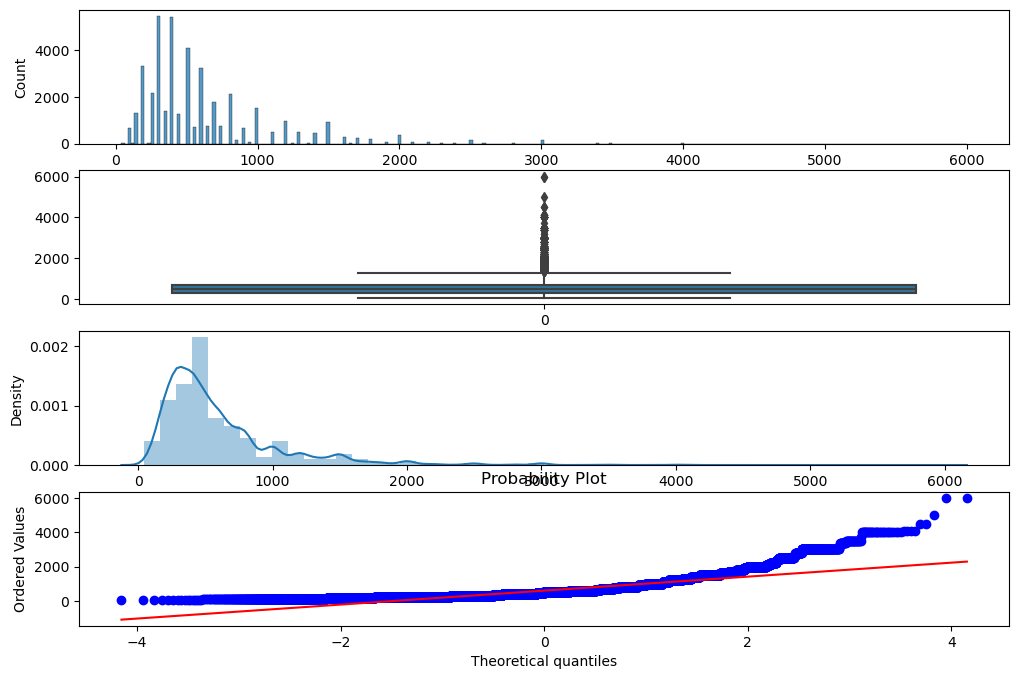

In [147]:
plt.figure(figsize=(12,8))

plt.subplot(411)
sns.histplot(data['approx_cost(for two people)'])

plt.subplot(412)
sns.boxplot(data['approx_cost(for two people)'])

plt.subplot(413)
sns.distplot(data['approx_cost(for two people)'])


plt.subplot(414)
stats.probplot(data['approx_cost(for two people)'] , plot=plt)

plt.show()

In [148]:
### Conclusion : ie we have a lot of Outliers in "approx_cost(for two people)"..

## 12.. Handling Outliers !

<Axes: xlabel='approx_cost(for two people)', ylabel='Density'>

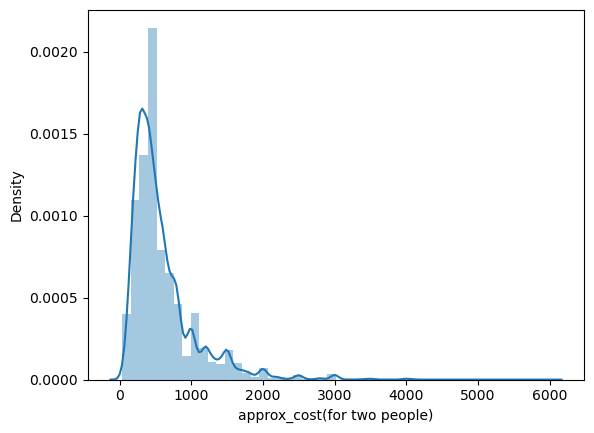

In [149]:
sns.distplot(data['approx_cost(for two people)'])

### there is skewness in data ..

In [150]:
### lets do Log transformation  , since we have skewness ...

In [151]:
np.log1p(data['approx_cost(for two people)'])

0        6.685861
1        6.685861
2        6.685861
3        5.707110
4        6.398595
           ...   
51709    6.685861
51711    6.685861
51712    7.313887
51715    7.824446
51716    7.313887
Name: approx_cost(for two people), Length: 42144, dtype: float64

<Axes: xlabel='approx_cost(for two people)', ylabel='Density'>

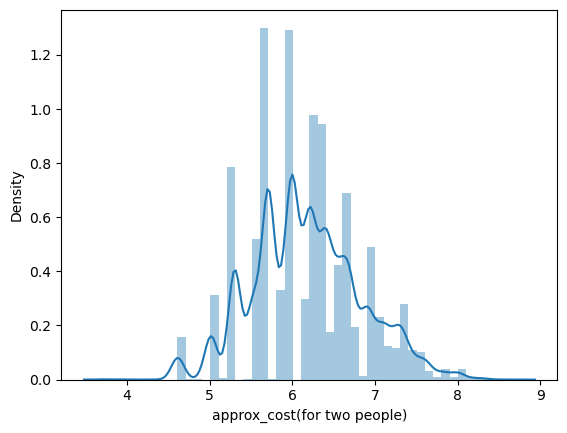

In [152]:
sns.distplot(np.log1p(data['approx_cost(for two people)']))

In [153]:
data['approx_cost(for two people)'] = np.log1p(data['approx_cost(for two people)'])

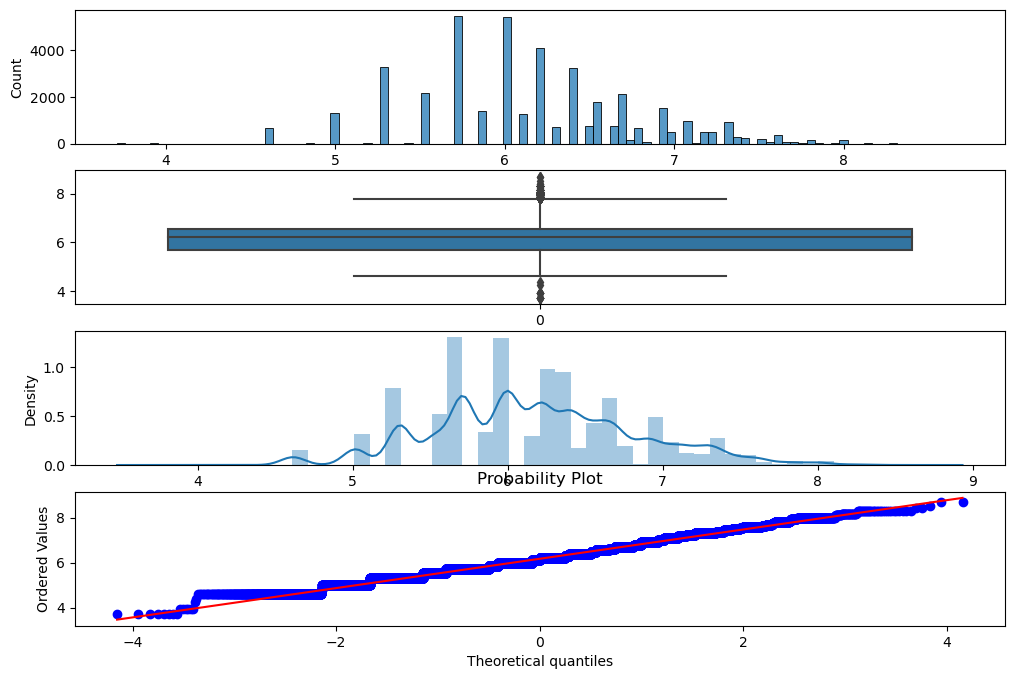

In [154]:
plt.figure(figsize=(12,8))

plt.subplot(411)
sns.histplot(data['approx_cost(for two people)'])

plt.subplot(412)
sns.boxplot(data['approx_cost(for two people)'])

plt.subplot(413)
sns.distplot(data['approx_cost(for two people)'])


plt.subplot(414)
stats.probplot(data['approx_cost(for two people)'] , plot=plt)

plt.show()

In [155]:
data.columns

Index(['votes', 'location', 'approx_cost(for two people)', 'listed_in(city)',
       'target', 'online_order_Yes', 'book_table_Yes',
       'rest_type_Casual Dining', 'rest_type_Delivery',
       'rest_type_Dessert Parlor', 'rest_type_Quick Bites', 'rest_type_other',
       'listed_in(type)_Cafes', 'listed_in(type)_Delivery',
       'listed_in(type)_Desserts', 'listed_in(type)_Dine-out',
       'listed_in(type)_Drinks & nightlife', 'listed_in(type)_Pubs and bars'],
      dtype='object')

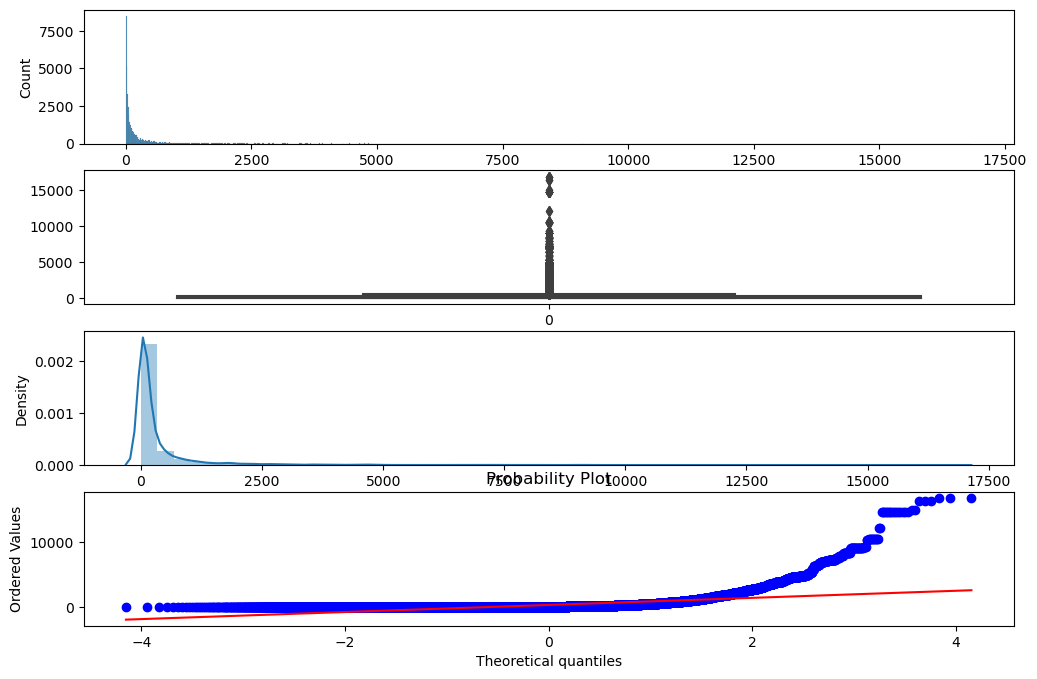

In [156]:
plt.figure(figsize=(12,8))

plt.subplot(411)
sns.histplot(data['votes'])

plt.subplot(412)
sns.boxplot(data['votes'])

plt.subplot(413)
sns.distplot(data['votes'])


plt.subplot(414)
stats.probplot(data['votes'] , plot=plt)

plt.show()

In [157]:
data['votes'] = np.log1p(data['votes'])

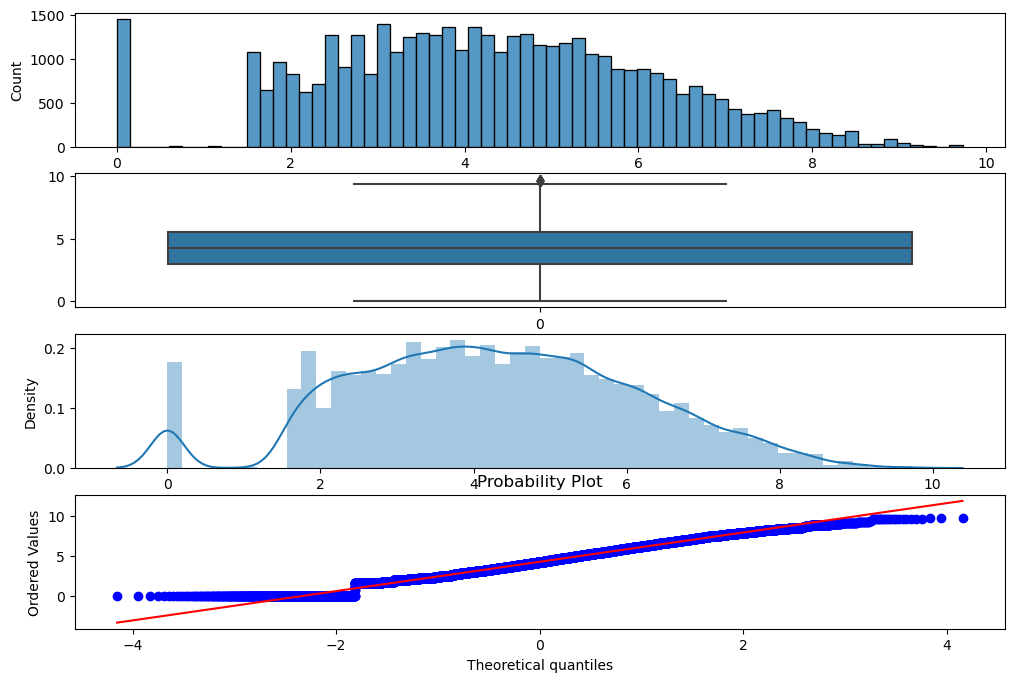

In [158]:
plt.figure(figsize=(12,8))

plt.subplot(411)
sns.histplot(data['votes'])

plt.subplot(412)
sns.boxplot(data['votes'])

plt.subplot(413)
sns.distplot(data['votes'])


plt.subplot(414)
stats.probplot(data['votes'] , plot=plt)

plt.show()

## 13.. Model building !

In [159]:
data.dtypes

votes                                 float64
location                              float64
approx_cost(for two people)           float64
listed_in(city)                       float64
target                                  int64
online_order_Yes                         bool
book_table_Yes                           bool
rest_type_Casual Dining                  bool
rest_type_Delivery                       bool
rest_type_Dessert Parlor                 bool
rest_type_Quick Bites                    bool
rest_type_other                          bool
listed_in(type)_Cafes                    bool
listed_in(type)_Delivery                 bool
listed_in(type)_Desserts                 bool
listed_in(type)_Dine-out                 bool
listed_in(type)_Drinks & nightlife       bool
listed_in(type)_Pubs and bars            bool
dtype: object

In [160]:
X = data.drop('target' , axis=1) ## independent data

In [161]:
y = data['target'] ## Dependent or Target data 

In [162]:
data

,votes,location,approx_cost(for two people),listed_in(city),target,online_order_Yes,book_table_Yes,rest_type_Casual Dining,rest_type_Delivery,rest_type_Dessert Parlor,rest_type_Quick Bites,rest_type_other,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
0,6.654153,0.477124,6.685861,0.477124,1,True,True,True,False,False,False,False,False,False,False,False,False,False
1,6.669498,0.477124,6.685861,0.477124,1,True,False,True,False,False,False,False,False,False,False,False,False,False
2,6.823286,0.477124,6.685861,0.477124,1,True,False,False,False,False,False,True,False,False,False,False,False,False
3,4.488636,0.477124,5.707110,0.477124,0,False,False,False,False,False,True,False,False,False,False,False,False,False
4,5.117994,0.523333,6.398595,0.477124,1,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,3.555348,0.404599,6.685861,0.404599,0,False,False,False,False,False,False,True,False,False,False,False,False,True
51711,4.406719,0.404599,6.685861,0.404599,0,False,False,False,False,False,False,True,False,False,False,False,False,True
51712,3.332205,0.404599,7.313887,0.404599,0,False,False,False,False,False,False,True,False,False,False,False,False,True
51715,5.468060,0.329670,7.824446,0.404599,1,False,True,False,False,False,False,True,False,False,False,False,False,True


In [163]:
from sklearn.model_selection import train_test_split

In [164]:
## getting training & testing data !
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [165]:
X_train.shape

(31608, 17)

In [166]:
data.shape

(42144, 18)

In [167]:
# Import the random forest model.
from sklearn.ensemble import RandomForestClassifier

In [168]:
# Initialize the model with default value of parameters..
rf_model = RandomForestClassifier()

In [169]:
# Fit the model to the data...
rf_model.fit(X_train , y_train)

RandomForestClassifier()

In [170]:
# Make predictions..

predictions = rf_model.predict(X_test)

In [171]:
predictions

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [172]:
from sklearn.metrics import accuracy_score , confusion_matrix

In [173]:
accuracy_score(predictions , y_test)

0.9055618830675778

In [174]:
# Compute the error.. \

confusion_matrix(predictions , y_test)

array([[4899,  487],
       [ 508, 4642]], dtype=int64)

## 14.. model hypertuning !

In [175]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(100 , 1200 , num=3)] 

# Number of features to consider at every split
max_features = ["auto", "sqrt"]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5 ,30 , num=3)]

# Minimum number of samples required to split a node
min_samples_split= [5 , 10 , 100]

In [176]:

# Create the random grid or hyper-parameter space

random_grid = {
    'n_estimators':n_estimators , 
    'max_features' : max_features , 
    'max_depth' : max_depth , 
    'min_samples_split' : min_samples_split
}

In [177]:
random_grid

{'n_estimators': [100, 650, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 17, 30],
 'min_samples_split': [5, 10, 100]}

In [178]:
## total iterations
3*2*3*3 *2

108

In [179]:
from sklearn.model_selection import RandomizedSearchCV

In [180]:
estimator = RandomForestClassifier() ### initialise your estimator

In [181]:
## Define searching

# Random search of parameters, using 2 fold cross validation
# search across 108 different combinations

In [182]:
rf_random = RandomizedSearchCV(estimator = estimator , param_distributions= random_grid , cv=2 , verbose=2 , n_jobs=-1)

In [183]:
rf_random.fit(X_train , y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 17, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 100],
                                        'n_estimators': [100, 650, 1200]},
                   verbose=2)

In [184]:
rf_random.best_params_ ## getting best values of parameters

{'n_estimators': 100,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 30}

In [185]:
rf_random.best_estimator_ ## getting best model(ie optimised model)

RandomForestClassifier(max_depth=30, min_samples_split=5)

In [186]:
rf_opt = RandomForestClassifier(max_depth=30, max_features='sqrt', min_samples_split=5,
                       n_estimators=650)

In [187]:
rf_opt.fit(X_train , y_train)

RandomForestClassifier(max_depth=30, min_samples_split=5, n_estimators=650)

In [188]:
predictions_opt = rf_opt.predict(X_test)

In [189]:
predictions_opt

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [190]:
accuracy_score(predictions_opt , y_test)

0.9010060744115413